In [1]:
fn = "des_y3_rsmodel_v0.8.1.fits"

In [2]:
from des_red_sequence import load_des_y3_data

rs_data = load_des_y3_data(fn)
rs_data._fields

('redshift', 'gr_0', 'ri_0', 'iz_0', 'gr_1', 'ri_1', 'iz_1', 'mz_0', 'covmat')

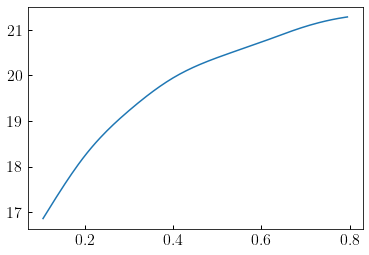

In [3]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(rs_data.redshift, rs_data.mz_0)

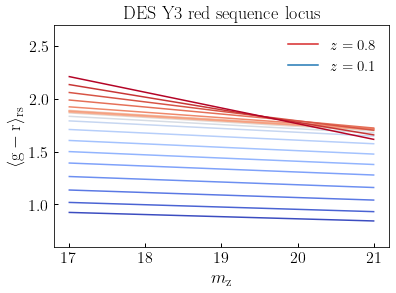

In [4]:
from des_red_sequence import compute_rs_locus
import matplotlib.cm as cm
from matplotlib import lines as mlines

m_z = np.linspace(17, 21, 50)

zarr = np.linspace(0.1, 0.8, 20)
colors=cm.coolwarm(np.linspace(0, 1, zarr.size)) # blue first

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0.6, 2.7)
for z_obs, c in zip(zarr, colors):
    __=ax.plot(m_z, compute_rs_locus(
        z_obs, m_z, rs_data.redshift, rs_data.gr_0, rs_data.gr_1, rs_data.mz_0), color=c)
    
xlabel = ax.set_xlabel(r'$m_{\rm z}$')
ylabel = ax.set_ylabel(r'$\langle{\rm g-r}\rangle_{\rm rs}$')
title = ax.set_title(r'${\rm DES\ Y3\ red\ sequence\ locus}$')

red_line=mlines.Line2D([],[],ls='-',c=mred,label=r'$z=0.8$')
blue_line=mlines.Line2D([],[],ls='-',c=mblue,label=r'$z=0.1$')
leg=ax.legend(handles=[red_line, blue_line])

fig.savefig('des_y3_red_sequence_locus.png', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200) 